## Простой пример нейронной сети: экстраполяция функции

In [81]:
import numpy as np
import matplotlib.pyplot as plt

Сгенерируем исходные данные: sin(x)

Populating the interactive namespace from numpy and matplotlib


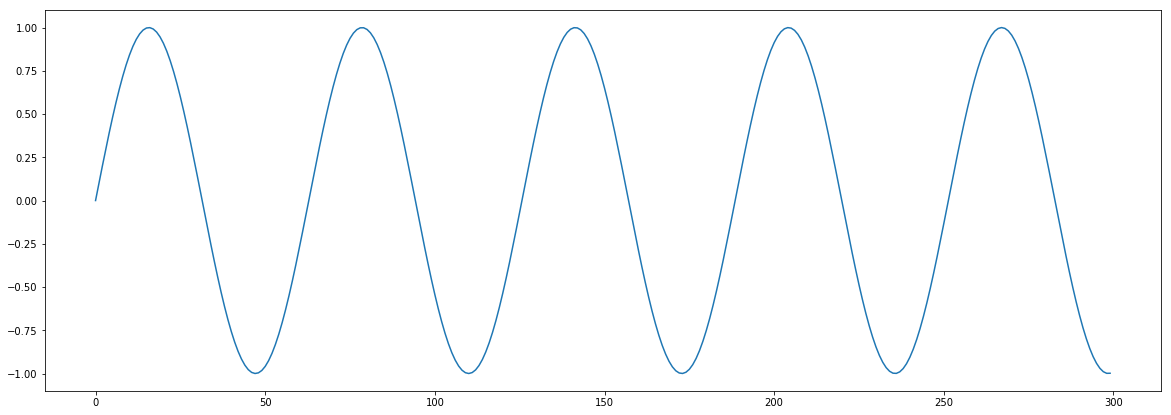

In [82]:
%pylab inline

data = [np.sin(0.1*x) for x in range(0, 300, 1)]

plt.figure(figsize(20,7))
plt.plot(data)
plt.show()

Воспользуемся методом бегущего окна и получим множества:  
* признаков - набор из *WINDOW_SIZE* значений функии  
* меток - значения функции в точке *WINDOW_SIZE+1*  

In [83]:
WINDOW_SIZE = 10

features = []  
labels = []  
for i in range(WINDOW_SIZE, len(data)):  
    features.append(data[i-WINDOW_SIZE:i])
    labels.append(data[i])

features, labels = np.array(features), np.array(labels) 

Разделим множества признаокв и меток на обучающую и тестовую выборки в соотношении 3/1

In [84]:
barrier = int(len(data)*0.75)

Y_train = labels[:barrier]
X_train = features[:barrier]
Y_test = labels[barrier:]
X_test = features[barrier:]

Создадим простую нейронную сеть

Ошибка на тестовых данных:  3.503207675608932e-05


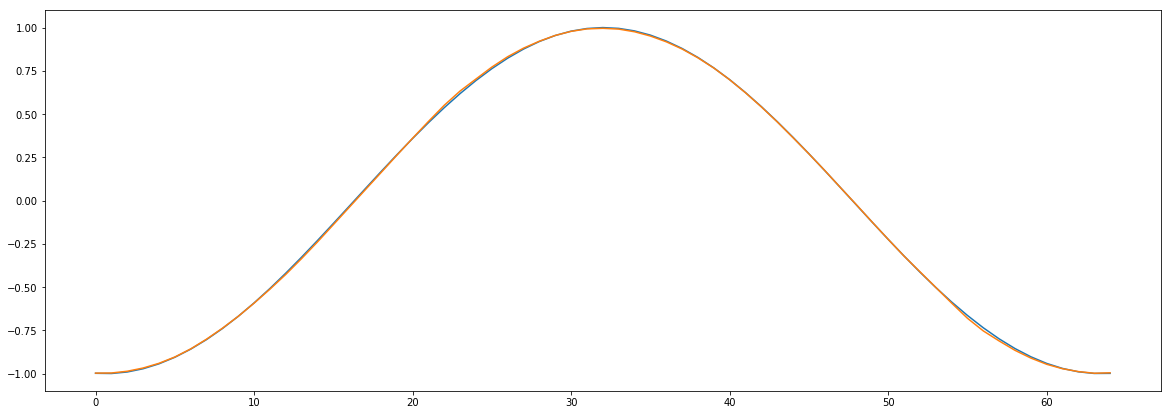

Wall time: 3.74 s


In [123]:
%%time
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=10, input_shape=(WINDOW_SIZE,)))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=256,
                    verbose=0)

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Ошибка на тестовых данных: ", scores[1])

pred = model.predict(X_test)

plt.plot(Y_test)
plt.plot(pred)
plt.show()

### Гиперпараметры  

* **При подгтовке данных**  
   * Размер окна
* **Сети (forward)**
   * Количство нейронов
   * Количество скрытых слоев
   * Функции активации
   * ~~Регуляризация~~
* **Сети (background)**
   * Функция потерь
   * Оптимизатор
   * Метрики
* **Обучения**
  * Количество эпох
  * Размер батча